# Avocado Case Study
The table below represents weekly 2018 retail scan data for National retail volume (units) and price. Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados. Starting in 2013, the table below reflects an expanded, multi-outlet retail data set. Multi-outlet reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar and military. The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags. The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados (e.g. greenskins) are not included in this table.

## Problem Statement
The dataset can be seen in two angles to find the city or region and find the average price. In both cases as labels are provided to us, it's an Supervised learning algorithm.

i. While predicting average price, it's an regression problem. As average price is a continuous feature.

ii. Whereas, since region is categorical variable. We will be doing applying classification algorithms.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Removed the null rows explicitly from the dataset
avacado_df = pd.read_csv('avacado.csv')
avacado_df

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.00,conventional,2015,Albany
1,1,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.00,conventional,2015,Albany
2,2,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.00,conventional,2015,Albany
3,3,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.00,conventional,2015,Albany
4,4,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.00,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1512,10,16-10-2016,1.39,190846.01,57529.11,56366.66,17531.78,59418.46,48823.53,10354.65,240.28,conventional,2016,Charlotte
1513,11,09-10-2016,1.51,178235.75,43325.87,52189.61,19419.57,63300.70,54704.14,8596.56,0.00,conventional,2016,Charlotte
1514,12,02-10-2016,1.48,178410.82,46364.75,52893.38,16736.92,62415.77,53332.61,8258.16,825.00,conventional,2016,Charlotte
1515,13,25-09-2016,1.47,189131.52,54110.79,53593.58,17495.42,63931.73,55653.47,8278.26,0.00,conventional,2016,Charlotte


# Regression Problem(Prediction of average price)
# EDA

In [3]:
avacado_df.isnull().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

Observations:

No null values are present in the dataset

In [4]:
avacado_df.describe()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,1517.000000,1517.000000,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1517.000000,1517.000000
mean,26.995386,1.074990,1.601879e+06,6.464387e+05,6.114375e+05,5.040550e+04,2.935974e+05,2.487736e+05,4.264205e+04,2181.771074,2015.162821
std,14.848287,0.188891,4.433143e+06,1.947614e+06,1.672906e+06,1.377812e+05,7.579765e+05,6.474765e+05,1.182157e+05,7455.712144,0.369324
min,0.000000,0.490000,3.875074e+04,4.677200e+02,1.783770e+03,0.000000e+00,3.311770e+03,3.311770e+03,0.000000e+00,0.000000,2015.000000
25%,14.000000,0.980000,1.474700e+05,2.040034e+04,4.147606e+04,9.112500e+02,3.620689e+04,2.972722e+04,5.407400e+02,0.000000,2015.000000
50%,29.000000,1.080000,4.027919e+05,8.175117e+04,1.186649e+05,7.688170e+03,7.397906e+04,6.237569e+04,5.044350e+03,0.000000,2015.000000
75%,39.000000,1.190000,9.819751e+05,3.775785e+05,4.851503e+05,2.916730e+04,1.576097e+05,1.461994e+05,2.926767e+04,401.480000,2015.000000
max,51.000000,1.680000,4.465546e+07,1.893304e+07,1.895648e+07,1.381516e+06,6.736304e+06,5.893642e+06,1.121076e+06,108072.790000,2016.000000


Observation:
i. Clearly outliers are present in features i.e. XLarge Bags, Small Bags, Total Bags etc. Later box plot will give us better understanding.

# Column expansions
Some relevant columns in the dataset:

Date - The date of the observation

AveragePrice - the average price of a single avocado

type - conventional or organic

year - the year

Region - the city or region of the observation

Total Volume - Total number of avocados sold

4046 - Total number of avocados with PLU 4046 sold

4225 - Total number of avocados with PLU 4225 sold

4770 - Total number of avocados with PLU 4770 sold

In [5]:
avacado_df.drop("Unnamed: 0", axis=1, inplace=True)

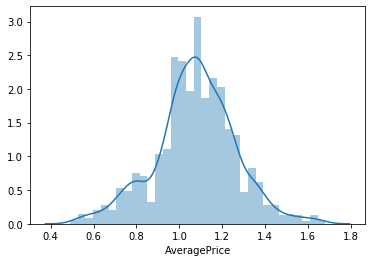

In [6]:
sns.distplot(avacado_df['AveragePrice'])

The target column is almost normally distributed

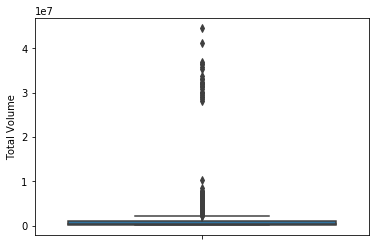

In [7]:
sns.boxplot(avacado_df['Total Volume'], orient='v')

Observations:

There are some outliers in the total volume columns

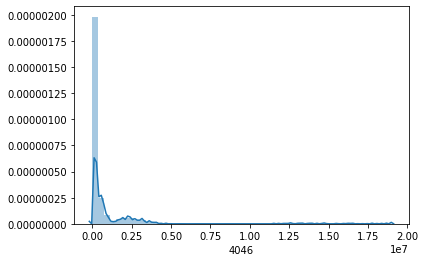

In [8]:
sns.distplot(avacado_df['4046'])

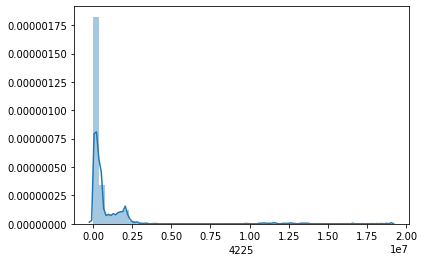

In [9]:
sns.distplot(avacado_df['4225'])

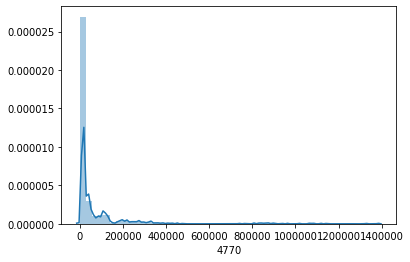

In [10]:
sns.distplot(avacado_df['4770'])

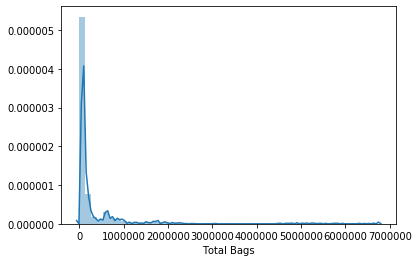

In [11]:
sns.distplot(avacado_df['Total Bags'])

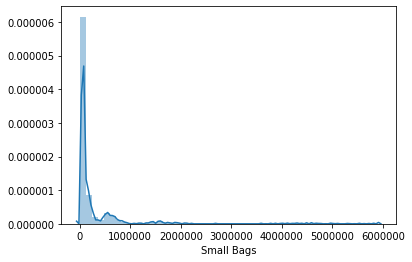

In [12]:
sns.distplot(avacado_df['Small Bags'])

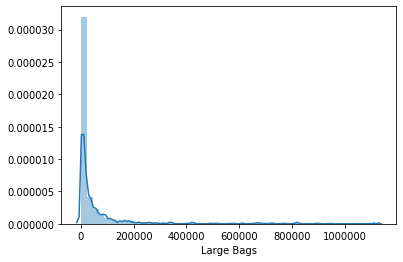

In [13]:
sns.distplot(avacado_df['Large Bags'])

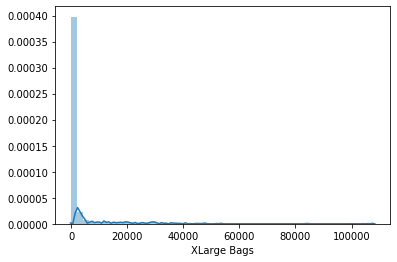

In [14]:
sns.distplot(avacado_df['XLarge Bags'])

Observation:
    
i. Features 4026, 4225, 4770 and Total Volume are highly correlated. We can drop any two of the said features.

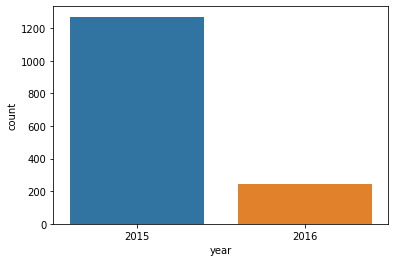

In [15]:
sns.countplot(avacado_df['year'])

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]),
 <a list of 51 Text xticklabel objects>)

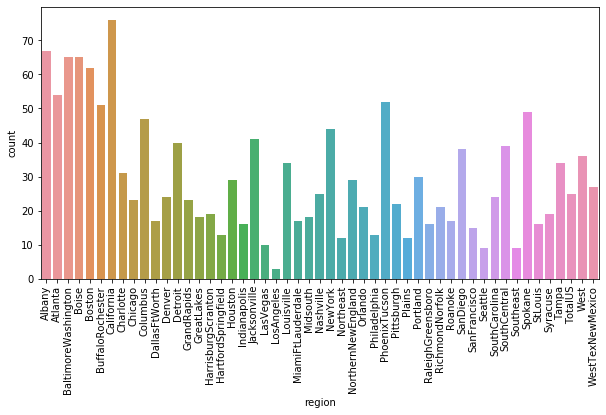

In [16]:
plt.figure(figsize=(10,5))
g=sns.countplot(avacado_df['region'])
plt.xticks(rotation=90)

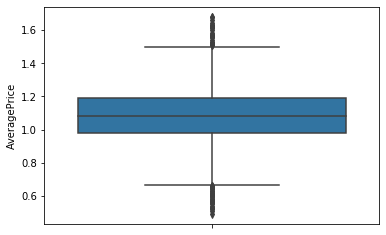

In [17]:
sns.boxplot(avacado_df['AveragePrice'], orient='v')

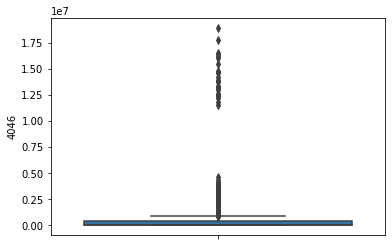

In [18]:
sns.boxplot(avacado_df['4046'], orient='v')

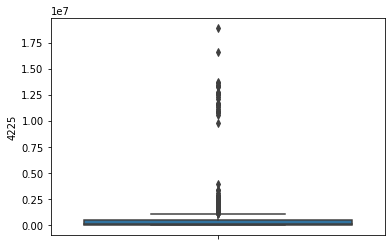

In [19]:
sns.boxplot(avacado_df['4225'], orient='v')

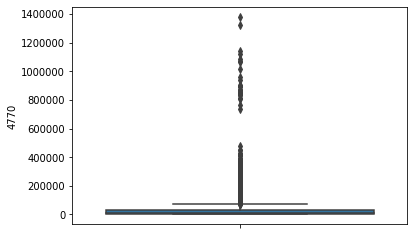

In [20]:
sns.boxplot(avacado_df['4770'], orient='v')

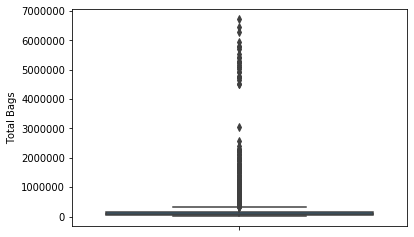

In [21]:
sns.boxplot(avacado_df['Total Bags'], orient='v')

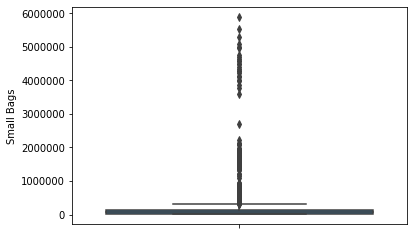

In [22]:
sns.boxplot(avacado_df['Small Bags'], orient='v')

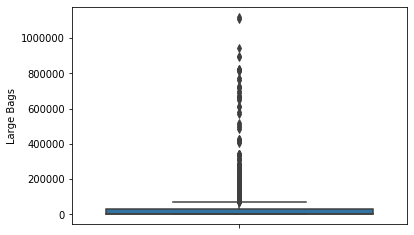

In [23]:
sns.boxplot(avacado_df['Large Bags'], orient='v')

In [24]:
avacado_df.drop(['Date', 'type'], axis=1, inplace=True)

In [25]:
avacado_df.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,region
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,2015,Albany
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,2015,Albany
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,2015,Albany
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,2015,Albany
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,2015,Albany


In [26]:
numeric_cols = avacado_df.select_dtypes(include=[np.number]).columns
avacado_df_copy = avacado_df[numeric_cols].copy()

In [27]:
import scipy.stats as stats
z_scores = stats.zscore(avacado_df_copy)
#calculate z-scores of `df`

abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
new_df = avacado_df_copy[filtered_entries]


In [28]:
new_df

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.00,2015
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.00,2015
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.00,2015
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.00,2015
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.00,2015
...,...,...,...,...,...,...,...,...,...,...
1512,1.39,190846.01,57529.11,56366.66,17531.78,59418.46,48823.53,10354.65,240.28,2016
1513,1.51,178235.75,43325.87,52189.61,19419.57,63300.70,54704.14,8596.56,0.00,2016
1514,1.48,178410.82,46364.75,52893.38,16736.92,62415.77,53332.61,8258.16,825.00,2016
1515,1.47,189131.52,54110.79,53593.58,17495.42,63931.73,55653.47,8278.26,0.00,2016


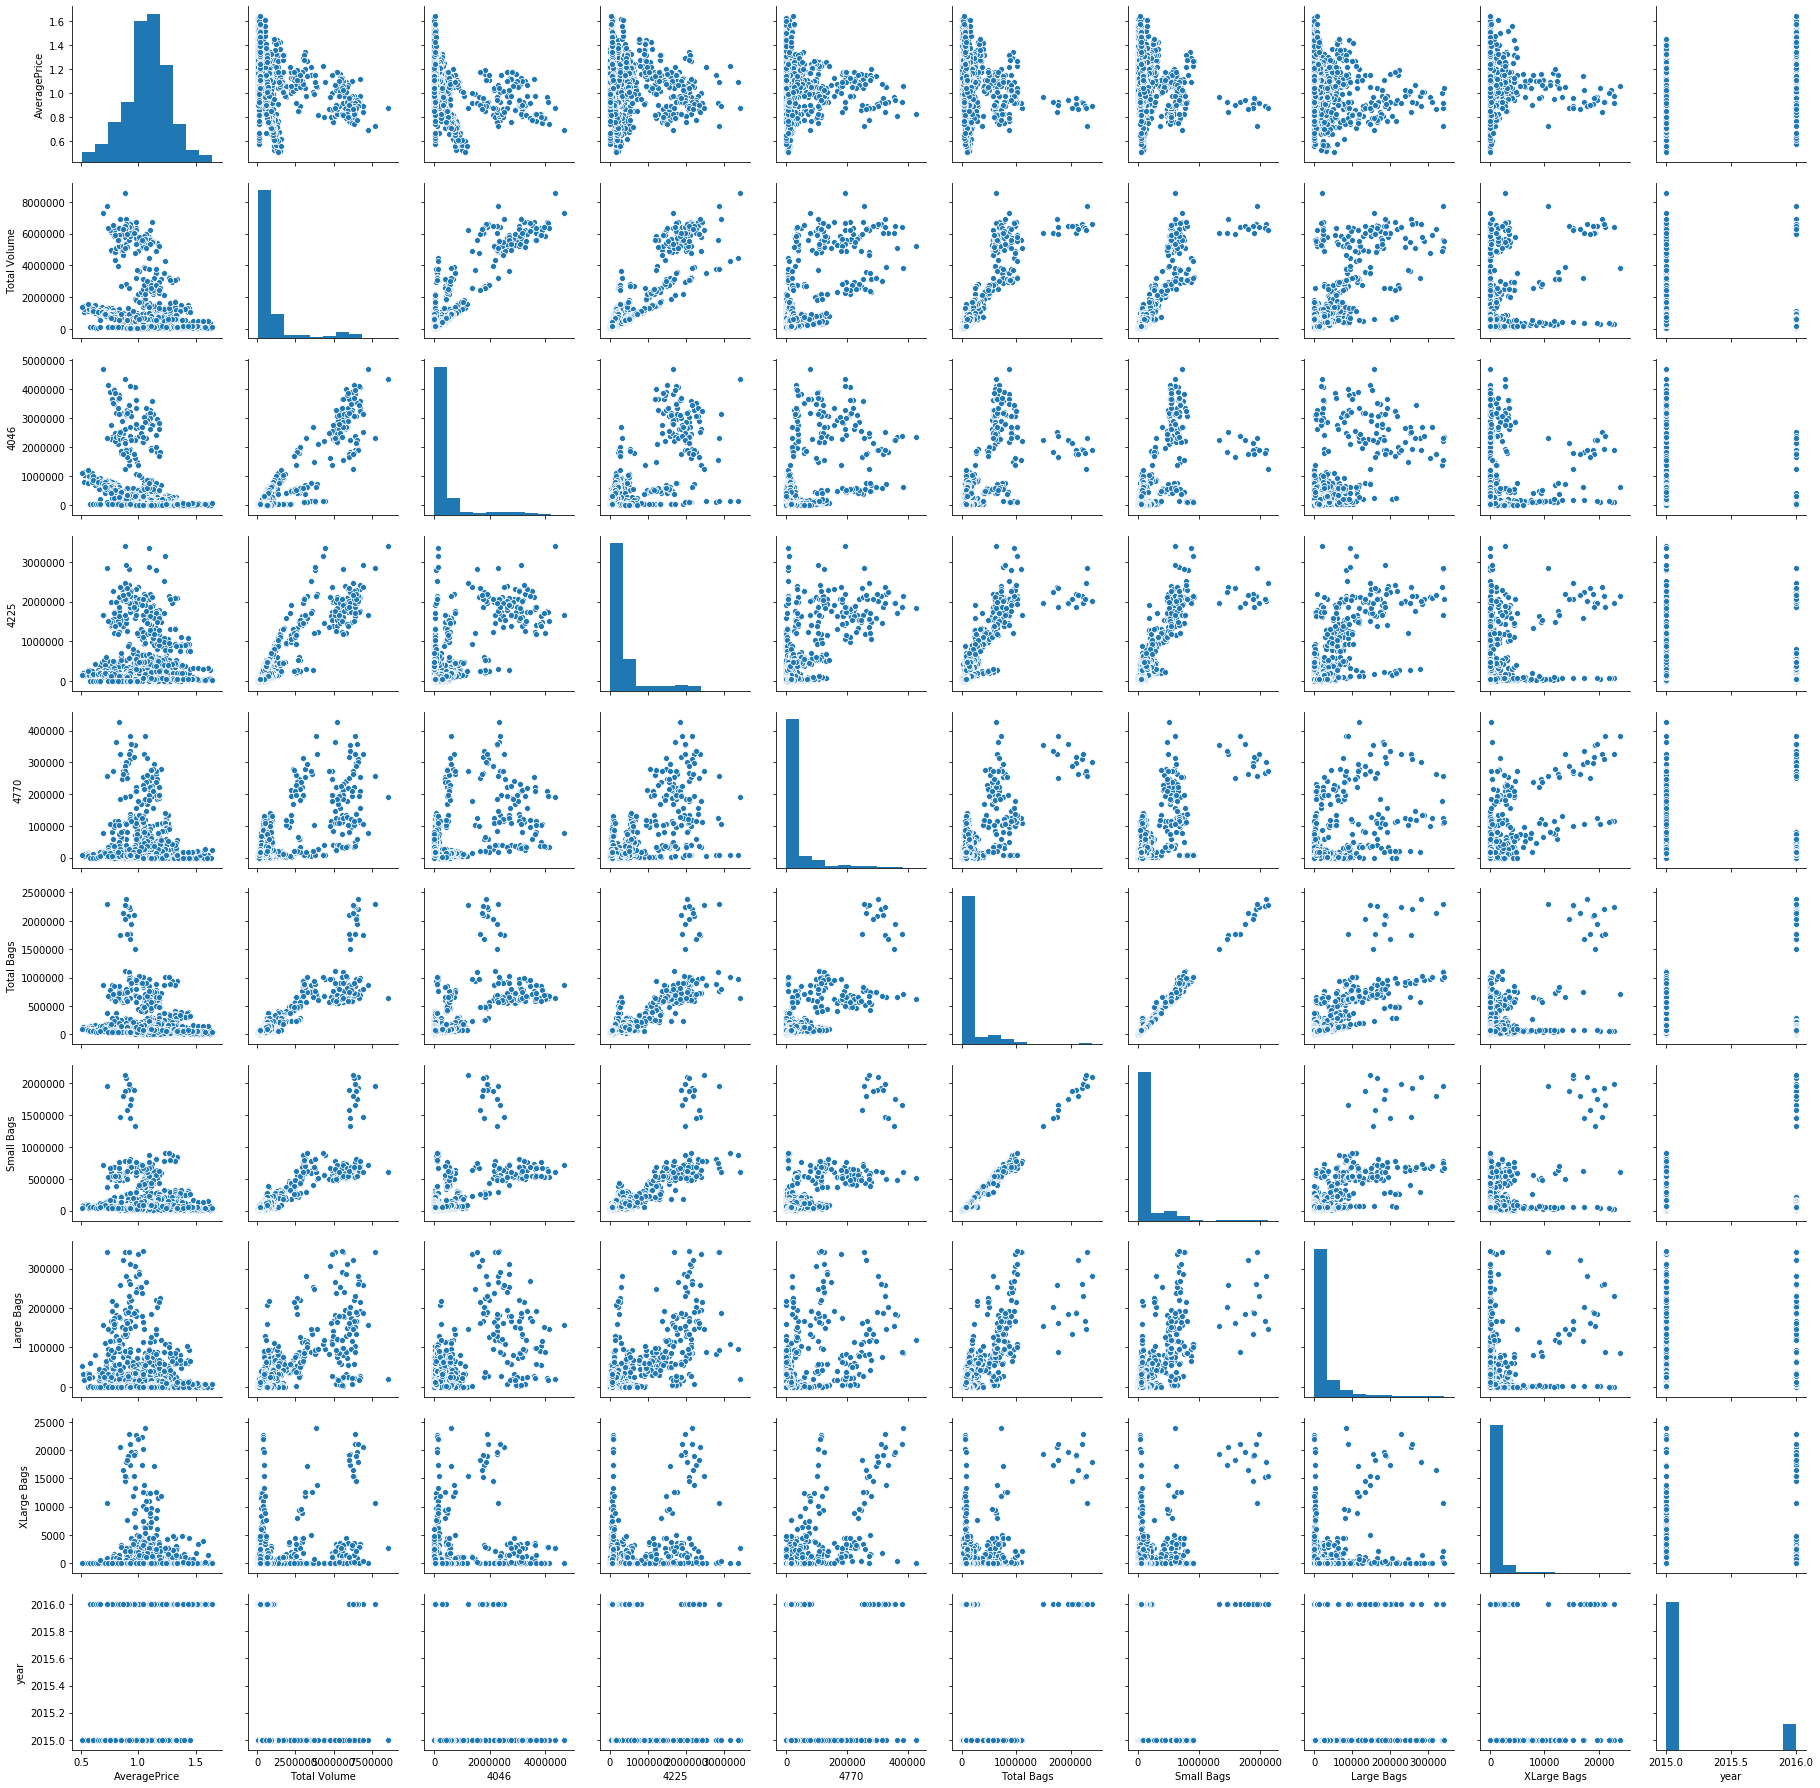

In [29]:
sns.pairplot(new_df)

(10.0, 0.0)

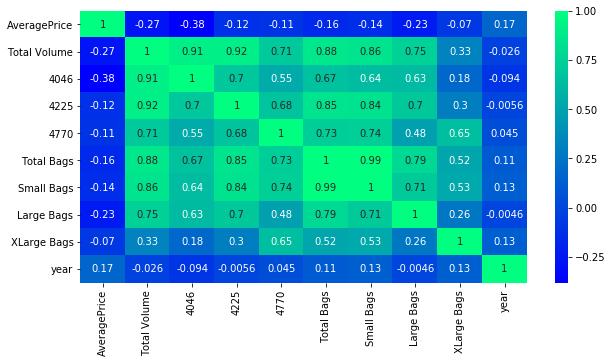

In [30]:
plt.figure(figsize=(10,5))
ax = sns.heatmap(new_df.corr() , annot=True,cmap='winter')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

## Observation:
i. Small bags and Total Bags are high correlated, so we can drop one of the feature.

ii. Total Volume and 4225 feature are highly correlated.

iii. XLLarge bag and  4770 are independent of output variable Average Price. We can drop them.

In [31]:
new_df.drop(['4046','4225','Small Bags', 'Large Bags'], axis =1, inplace=True)

In [32]:
new_df.head()

,AveragePrice,Total Volume,4770,Total Bags,XLarge Bags,year
0,1.33,64236.62,48.16,8696.87,0.0,2015
1,1.35,54876.98,58.33,9505.56,0.0,2015
2,0.93,118220.22,130.50,8145.35,0.0,2015
3,1.08,78992.15,72.58,5811.16,0.0,2015
4,1.28,51039.60,75.78,6183.95,0.0,2015


# Normalising the data

In [33]:
# Normalize the data attributes for the Iris dataset.
from sklearn.datasets import load_iris
from sklearn import preprocessing

# separate the data from the target attributes
Y = new_df['AveragePrice']
X = new_df.drop('AveragePrice',axis=1)
# normalize the data attributes
normalized_X = preprocessing.normalize(X)

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score, mean_absolute_error ,mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor,GradientBoostingRegressor,RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# Model Selection 

In [35]:
best_rstate=0
score=0
algo_list= [LinearRegression(),DecisionTreeRegressor(),KNeighborsRegressor(),AdaBoostRegressor(),GradientBoostingRegressor(),RandomForestRegressor(),SVR()]
for algo in algo_list:
    for i in range(42,101):
        x_train,x_test,y_train,y_test=train_test_split(normalized_X,Y,test_size=0.25,random_state=i)
        mod=algo
        mod.fit(x_train,y_train)
        y_pred=mod.predict(x_test)
        tempscore=r2_score(y_test,y_pred)
        if tempscore>score:
            score=tempscore
            best_rstate=i
    print(f"Best R2 Score {score*100} found with {algo} at random state {best_rstate} \n")

Best R2 Score 31.684595642667922 found with LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False) at random state 78 

Best R2 Score 62.49213244213405 found with DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best') at random state 88 

Best R2 Score 62.49213244213405 found with KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform') at random state 88 

Best R2 Score 62.49213244213405 found with AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',
                  n_estimators=50, random_state=None) at random state 

In [36]:
from sklearn.model_selection import cross_val_score

x_train,x_test,y_train,y_test=train_test_split(normalized_X,Y,test_size=0.20,random_state=85)
mod=SVR(gamma='auto_deprecated',tol=0.001)
mod.fit(x_train,y_train)
y_pred=mod.predict(x_test)
tempaccu=r2_score(y_test,y_pred)


score = cross_val_score(mod,X,Y,cv=5,scoring='r2').mean()
print("std: {}".format(score.std()))
print("cross_val_score: {}".format(score*100))

std: 0.0
cross_val_score: -8.367431739849813


In [37]:
lm=SVR()
x_train,x_test,y_train,y_test=train_test_split(normalized_X,Y,random_state=87,test_size=0.2)
lm.fit(x_train,y_train)
pred=lm.predict(x_test)
# Checking error and accuracy
print("r2_score is ",r2_score(pred,y_test))
print("RMSE is ", mean_squared_error(y_test,pred))

r2_score is  -7.315325983468604
RMSE is  0.03315265566770837


# Classification problem

i. We need to predict region in this scenario, data preprocessing and EDA have been performed already.
ii. Region is discrete variable, we need to apply classification algorithms.

In [38]:
from sklearn.datasets import load_iris
from sklearn import preprocessing

# separate the data from the target attributes
Y = avacado_df['region']
X = avacado_df.drop('region',axis=1)
# normalize the data attributes
normalized_X_Class = preprocessing.normalize(X)

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report,roc_auc_score,roc_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier,RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [40]:
best_rstate=0
score=0
algo_list= [LogisticRegression(),DecisionTreeClassifier(),MultinomialNB(),KNeighborsClassifier(),SVC(),AdaBoostClassifier(),GradientBoostingClassifier(), RandomForestClassifier()]
for algo in algo_list:
    for i in range(42,101):
        x_train,x_test,y_train,y_test=train_test_split(normalized_X_Class,Y,test_size=0.25,random_state=i)
        mod=algo
        mod.fit(x_train,y_train)
        y_pred=mod.predict(x_test)
        tempscore=accuracy_score(y_test,y_pred)
        if tempscore>score:
            score=tempscore
            best_rstate=i
    print(f"Best accuracy Score {score*100} found with {algo} at random state {best_rstate} \n")

Best accuracy Score 28.947368421052634 found with LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False) at random state 77 

Best accuracy Score 90.78947368421053 found with DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best') at random state 56 

Best accuracy Score 90.78947368421053 found with MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True) at random state 56 



# Finalising the model

In [41]:
x_train,x_test,y_train,y_test=train_test_split(normalized_X_Class,Y,test_size=0.20,random_state=56)
Best_Model = RandomForestClassifier()
parameters = {"n_estimators":[10,20,30,100],"criterion":['gini', 'entropy'],"max_features":['auto', 'sqrt', 'log2']}
gs=GridSearchCV(Best_Model,parameters)
gs.fit(x_train,y_train)
gs.best_estimator_.get_params()

C:\Users\Sankalp\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'bootstrap': True,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'log2',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [45]:
x_train,x_test,y_train,y_test=train_test_split(normalized_X_Class,Y,test_size=0.25,random_state=49)
mod=RandomForestClassifier()
mod.fit(x_train,y_train)
y_pred=mod.predict(x_test)
tempaccu=accuracy_score(y_test,y_pred)
print(confusion_matrix(y_pred,y_test))
print(classification_report(y_pred,y_test))

[[18  0  0 ...  0  0  0]
 [ 0 11  0 ...  0  0  0]
 [ 0  0 15 ...  0  0  0]
 ...
 [ 0  0  0 ...  7  0  0]
 [ 0  0  0 ...  0  3  0]
 [ 0  0  0 ...  0  0  5]]
                     precision    recall  f1-score   support

             Albany       1.00      0.90      0.95        20
            Atlanta       0.92      0.85      0.88        13
BaltimoreWashington       1.00      0.94      0.97        16
              Boise       0.94      1.00      0.97        16
             Boston       0.93      0.93      0.93        14
   BuffaloRochester       0.89      0.94      0.91        17
         California       0.95      1.00      0.97        19
          Charlotte       1.00      0.78      0.88         9
            Chicago       1.00      1.00      1.00         7
           Columbus       1.00      1.00      1.00        11
      DallasFtWorth       1.00      1.00      1.00         4
             Denver       1.00      1.00      1.00         9
            Detroit       1.00      1.00      1.00

In [43]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(mod,X,Y,cv=30,scoring='accuracy').mean()
print("std: {}".format(score.std()))
print("cross_val_score: {}".format(score*100))

std: 0.0
cross_val_score: 95.03552282701946


In [44]:
# Saving the model using joblib
import joblib
# Saving model as pickle in a file
joblib.dump(mod,'rfc_avocado.pkl')

['rfc_avocado.pkl']